# Other Regression Models

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Import the cleaned dataset with no outliers and encoded
df = pd.read_csv('CO2 Emissions_Canada_cleaned_removed_outliers_encoded.csv')
df.drop(df.columns[0], axis=1, inplace=True)

print("Data type : ", type(df))
print("Data dims : ", df.shape)

df.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (5965, 31)


,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Number of Gears,Vehicle Class_COMPACT,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,...,Transmission_A,Transmission_AM,Transmission_AS,Transmission_AV,Transmission_M,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,8.5,196,5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.4,4,9.6,221,6,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.5,4,5.9,136,7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.5,6,11.1,255,6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.5,6,10.6,244,6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
print(df.dtypes)

Engine Size(L)                            float64
Cylinders                                   int64
Fuel Consumption Comb (L/100 km)          float64
CO2 Emissions(g/km)                         int64
Number of Gears                             int64
Vehicle Class_COMPACT                     float64
Vehicle Class_FULL-SIZE                   float64
Vehicle Class_MID-SIZE                    float64
Vehicle Class_MINICOMPACT                 float64
Vehicle Class_MINIVAN                     float64
Vehicle Class_PICKUP TRUCK - SMALL        float64
Vehicle Class_PICKUP TRUCK - STANDARD     float64
Vehicle Class_SPECIAL PURPOSE VEHICLE     float64
Vehicle Class_STATION WAGON - MID-SIZE    float64
Vehicle Class_STATION WAGON - SMALL       float64
Vehicle Class_SUBCOMPACT                  float64
Vehicle Class_SUV - SMALL                 float64
Vehicle Class_SUV - STANDARD              float64
Vehicle Class_TWO-SEATER                  float64
Vehicle Class_VAN - CARGO                 float64


## Multi-Variate Random Forests for Regression
Using the same encoded dataset, we will employ Random Forests for Regression using `RandomForestRegressor` class from the `sklearn` library 

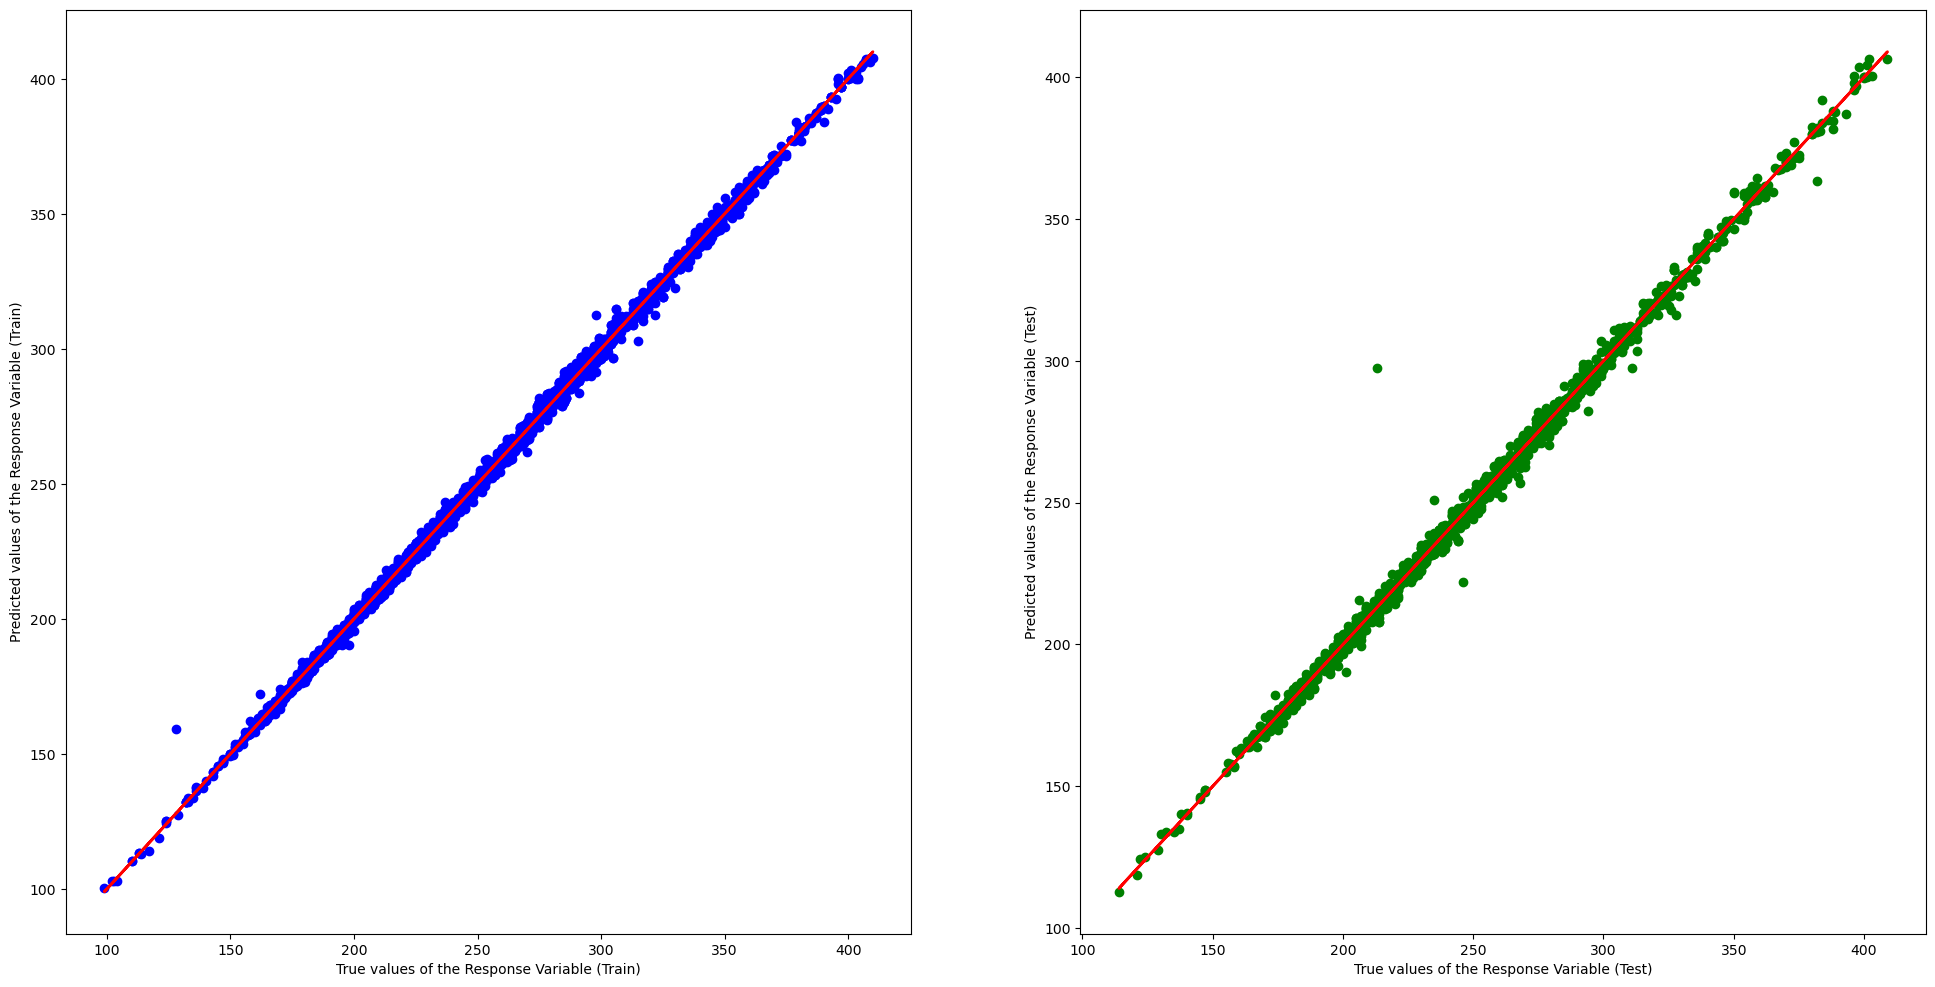

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9990451786713593
Mean Squared Error (MSE) 	: 2.843972611586878
Adjusted R^2 			: 0.9990387300806661
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9956043853790657
Mean Squared Error (MSE) 	: 12.352443297806165
Adjusted R^2 			: 0.9955141263519418


In [34]:
# Import important functions
from sklearn.ensemble import RandomForestRegressor

# Extract Response and Predictors
X = df.drop(columns=['CO2 Emissions(g/km)'])
Y = df['CO2 Emissions(g/km)']

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

#RandomForestRegression
regress = RandomForestRegressor()
regress.fit(X_train, y_train)

#Plot
y_train_pred = regress.predict(X_train)
y_test_pred = regress.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Number of observations (total samples)
n_train = X_train.shape[0]
n_test = X_test.shape[0]

# Number of predictors
p = X_train.shape[1]

# Adjusted R^2 on Train Data
adjusted_r2_train = 1 - ((1 - regress.score(X_train, y_train)) * (n_train - 1) / (n_train - p - 1))

# Adjusted R^2 on Test Data
adjusted_r2_test = 1 - ((1 - regress.score(X_test, y_test)) * (n_test - 1) / (n_test - p - 1))

#Goodness of fit 
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regress.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Adjusted R^2 \t\t\t:", adjusted_r2_train)

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regress.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Adjusted R^2 \t\t\t:", adjusted_r2_test)

### Hyperparameter Tuning

In [5]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': np.arange(50,501,50),   # number of trees 50, 100, ..., 500
              'max_depth': np.arange(2, 11)           # depth of trees 2, 3, 4, 5, ..., 10
}

grid_search = GridSearchCV(RandomForestRegressor(), 
                           param_grid, 
                           cv=5,
                          scoring ="neg_mean_squared_error")

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 10, 'n_estimators': 400}
-11.670423417042777


### Use the Best Model found through GridSearchCV

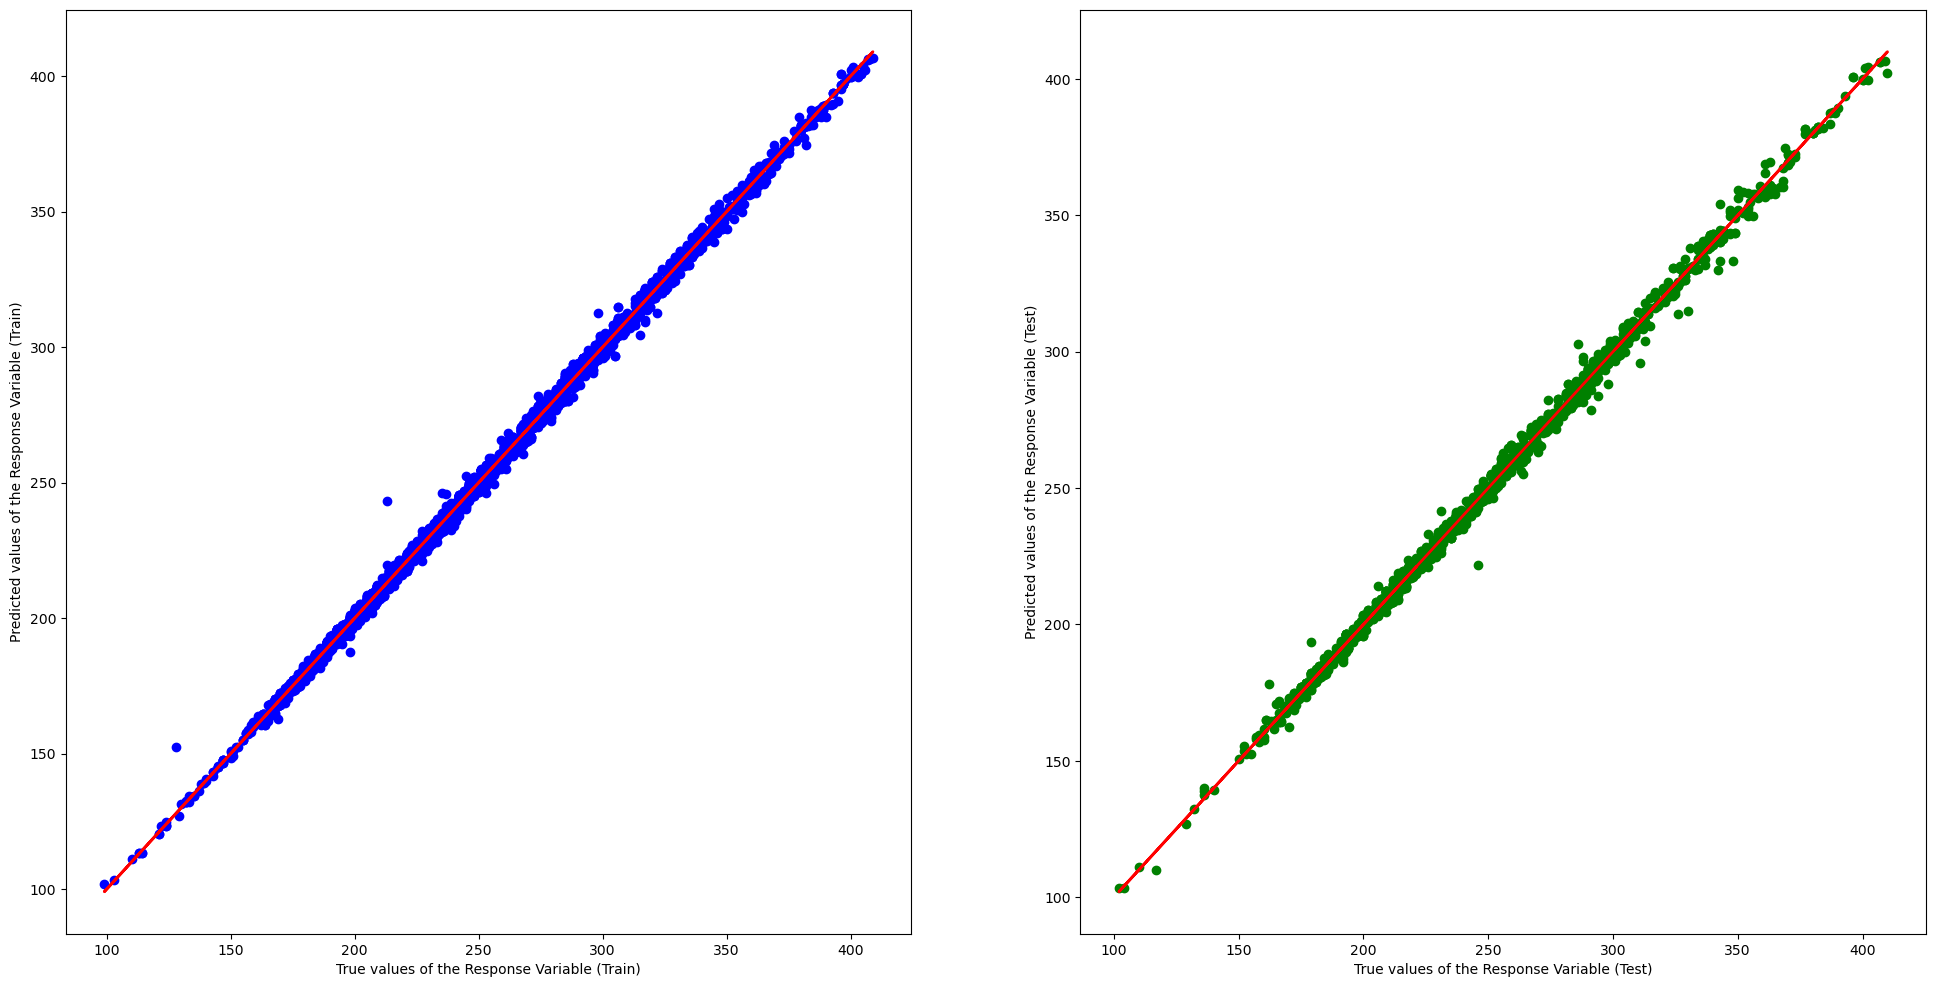

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9984474346891999
Mean Squared Error (MSE) 	: 4.508308811818398
Adjusted R^2 			: 0.9984369491062814
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9972963856373201
Mean Squared Error (MSE) 	: 8.205789520165602
Adjusted R^2 			: 0.9972408699419879


In [6]:
# Import important functions
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Extract Response and Predictors
X = df.drop(columns=['CO2 Emissions(g/km)'])
Y = df['CO2 Emissions(g/km)']

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

#RandomForestRegression
regress = RandomForestRegressor(n_estimators = 400,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree
regress.fit(X_train, y_train)

#Plot
y_train_pred = regress.predict(X_train)
y_test_pred = regress.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Number of observations (total samples)
n_train = X_train.shape[0]
n_test = X_test.shape[0]

# Number of predictors
p = X_train.shape[1]

# Adjusted R^2 on Train Data
adjusted_r2_train = 1 - ((1 - regress.score(X_train, y_train)) * (n_train - 1) / (n_train - p - 1))

# Adjusted R^2 on Test Data
adjusted_r2_test = 1 - ((1 - regress.score(X_test, y_test)) * (n_test - 1) / (n_test - p - 1))

#Goodness of fit 
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regress.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Adjusted R^2 \t\t\t:", adjusted_r2_train)

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regress.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Adjusted R^2 \t\t\t:", adjusted_r2_test)

## Multi-Variate K-Nearest Neighbors Regression
Using the same encoded dataset, we will employ  K-Nearest Neighbors Regression using using `KNeighboursRegressor` class from the `sklearn` library 

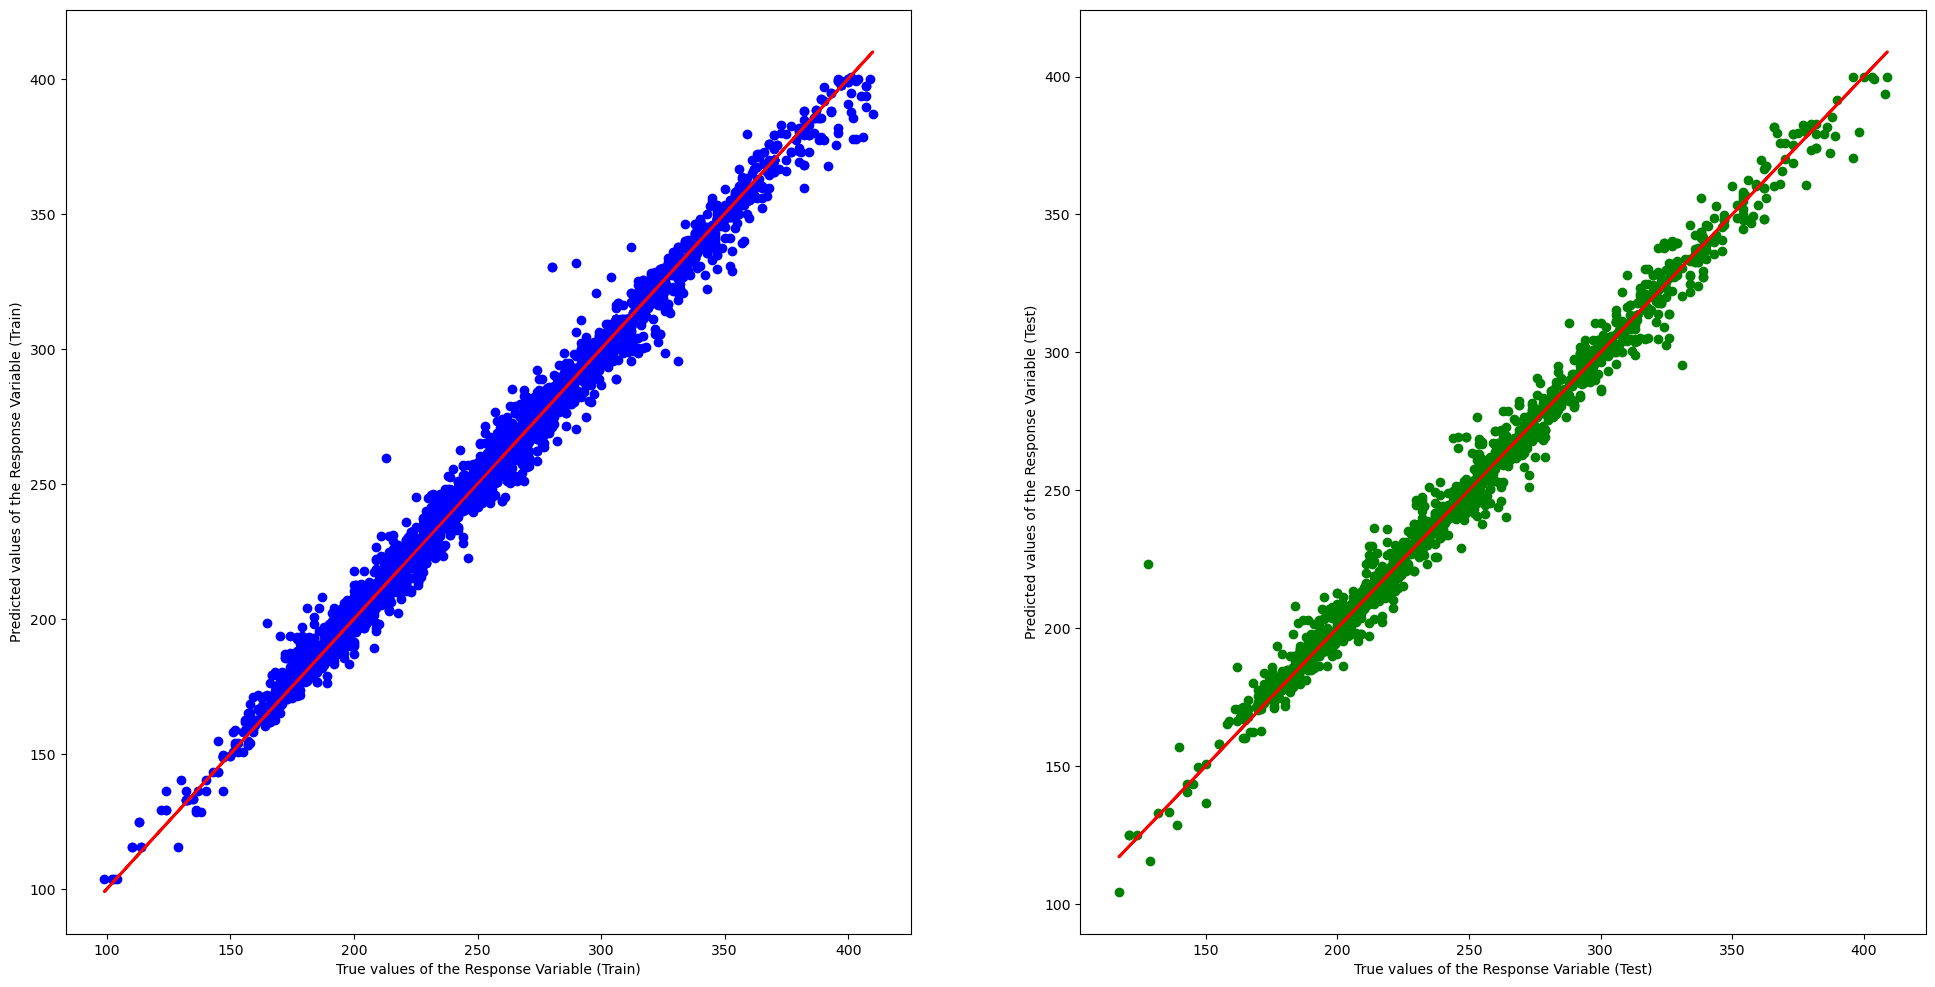

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9906930881992915
Mean Squared Error (MSE) 	: 27.33302034428795
Adjusted R^2 			: 0.9906302319737126
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9853307717151739
Mean Squared Error (MSE) 	: 43.053780160857904
Adjusted R^2 			: 0.9850295555286271


In [7]:
# Import important functions
from sklearn.neighbors import KNeighborsRegressor

# Extract Response and Predictors
X = df.drop(columns=['CO2 Emissions(g/km)'])
Y = df['CO2 Emissions(g/km)']

# Split the Dataset into random Train and Test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size = 0.25)

knn = KNeighborsRegressor()

knn.fit(X_train2, y_train2)

#Plot
y_train_pred2 = knn.predict(X_train2)
y_test_pred2 = knn.predict(X_test2)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train2, y_train_pred2, color = "blue")
axes[0].plot(y_train2, y_train2, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test2, y_test_pred2, color = "green")
axes[1].plot(y_test2, y_test2, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Number of observations (total samples)
n_train = X_train2.shape[0]
n_test = X_test2.shape[0]

# Number of predictors
p = X_train2.shape[1]

# Adjusted R^2 on Train Data
adjusted_r2_train2 = 1 - ((1 - knn.score(X_train2, y_train2)) * (n_train - 1) / (n_train - p - 1))

# Adjusted R^2 on Test Data
adjusted_r2_test2 = 1 - ((1 - knn.score(X_test2, y_test2)) * (n_test - 1) / (n_test - p - 1))

#Goodness of fit 
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", knn.score(X_train2, y_train2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train2, y_train_pred2))
print("Adjusted R^2 \t\t\t:", adjusted_r2_train2)

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", knn.score(X_test2, y_test2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test2, y_test_pred2))
print("Adjusted R^2 \t\t\t:", adjusted_r2_test2)

### Hyperparameter Tuning

In [8]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

#parameter grid for KNN
param_grid = {
    'n_neighbors':[2,3,5,7,8,11],
    'leaf_size': [10, 20, 30], 
    'metric': ['euclidean', 'manhattan']  
}

# initialize gridsearchcv object for KNN
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv = 5, scoring ="neg_mean_squared_error")

grid_search.fit(X_train2, y_train2)

print(grid_search.best_estimator_)
print(grid_search.best_score_)

KNeighborsRegressor(leaf_size=10, metric='euclidean', n_neighbors=2)
-37.39148119680552


### Use the Best Model found through GridSearchCV

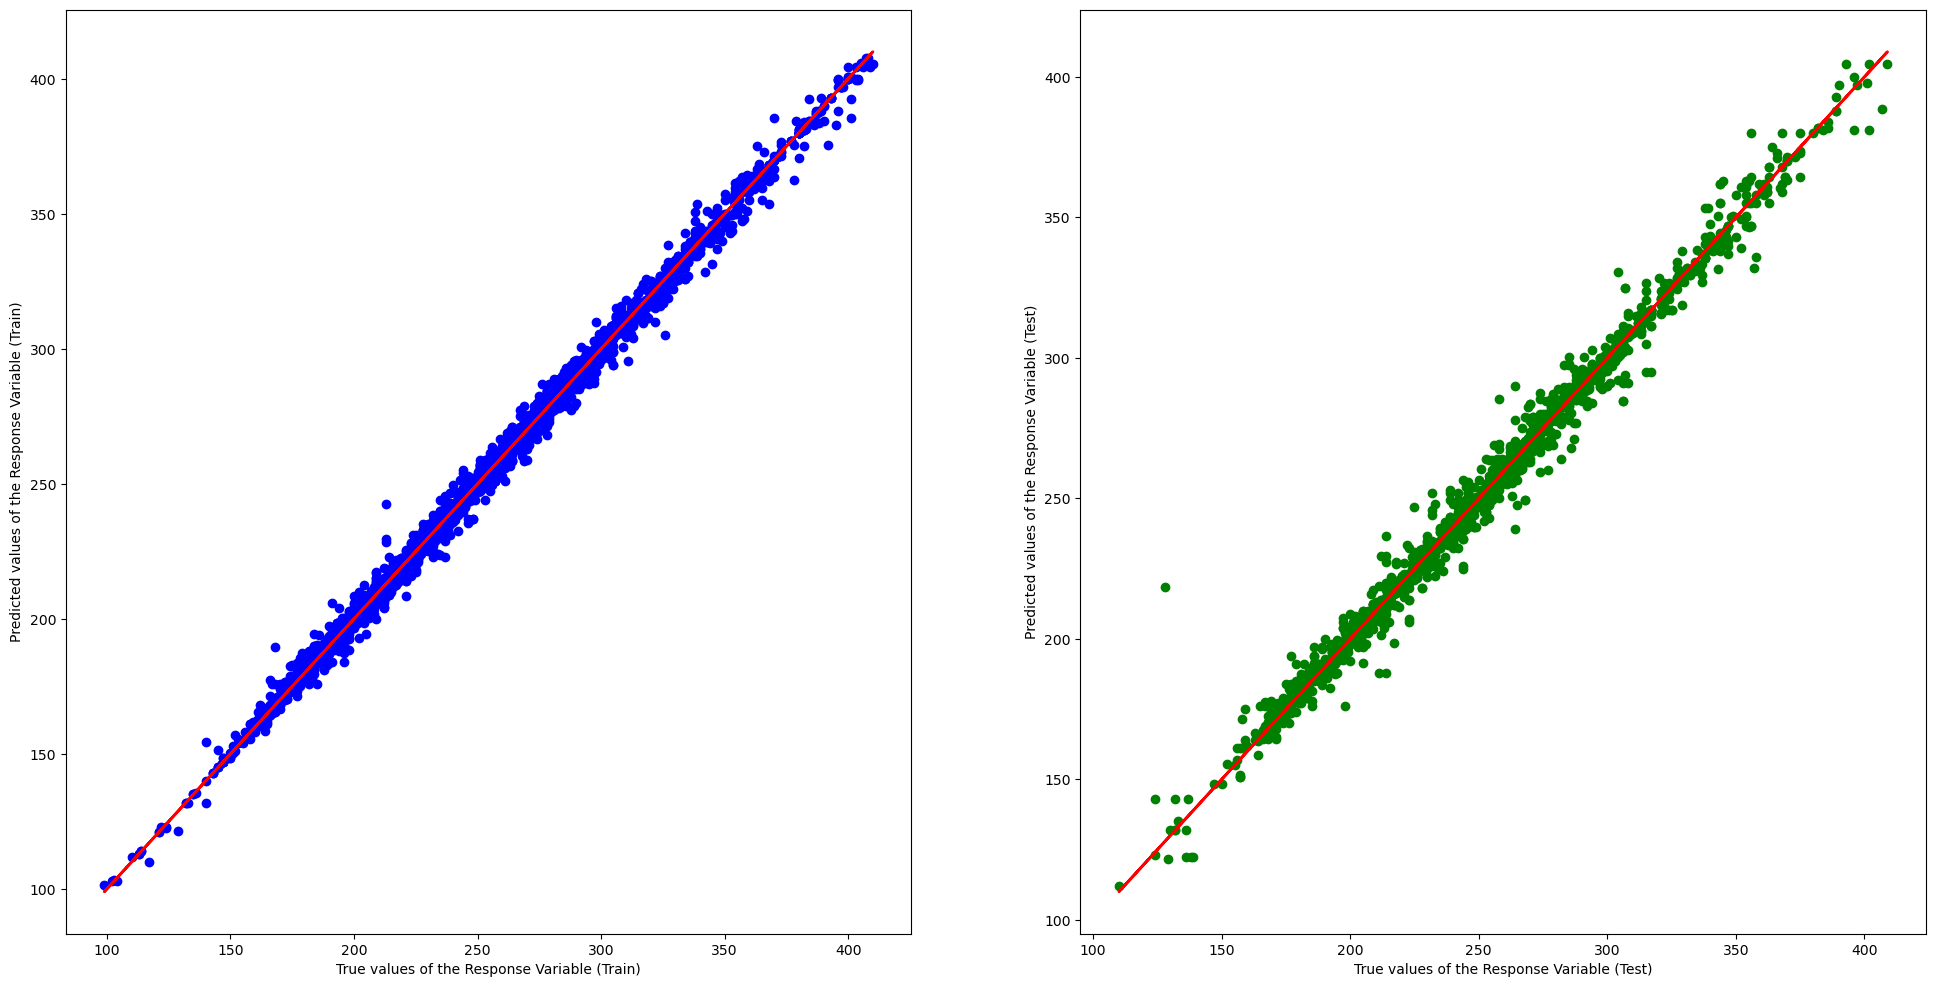

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9972481614159093
Mean Squared Error (MSE) 	: 8.085792532975631
Adjusted R^2 			: 0.997229576283644
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9876190591680296
Mean Squared Error (MSE) 	: 36.28485254691689
Adjusted R^2 			: 0.9873648304035127


In [10]:
# Import important functions
from sklearn.neighbors import KNeighborsRegressor

# Extract Response and Predictors
X = df.drop(columns=['CO2 Emissions(g/km)'])
Y = df['CO2 Emissions(g/km)']

# Split the Dataset into random Train and Test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size = 0.25)

knn = KNeighborsRegressor(n_neighbors = 2, leaf_size = 10, metric = 'euclidean')

knn.fit(X_train2, y_train2)

#Plot
y_train_pred2 = knn.predict(X_train2)
y_test_pred2 = knn.predict(X_test2)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train2, y_train_pred2, color = "blue")
axes[0].plot(y_train2, y_train2, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test2, y_test_pred2, color = "green")
axes[1].plot(y_test2, y_test2, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Number of observations (total samples)
n_train = X_train2.shape[0]
n_test = X_test2.shape[0]

# Number of predictors
p = X_train2.shape[1]

# Adjusted R^2 on Train Data
adjusted_r2_train2 = 1 - ((1 - knn.score(X_train2, y_train2)) * (n_train - 1) / (n_train - p - 1))

# Adjusted R^2 on Test Data
adjusted_r2_test2 = 1 - ((1 - knn.score(X_test2, y_test2)) * (n_test - 1) / (n_test - p - 1))

#Goodness of fit 
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", knn.score(X_train2, y_train2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train2, y_train_pred2))
print("Adjusted R^2 \t\t\t:", adjusted_r2_train2)

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", knn.score(X_test2, y_test2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test2, y_test_pred2))
print("Adjusted R^2 \t\t\t:", adjusted_r2_test2)

## Evaluating the 3 Regression Models

**Linear Regression**  
Train Dataset  
Explained Variance (R^2): 0.9917045617513961  
Mean Squared Error (MSE): 24.39412172080242   
Adjusted R^2            : 0.9916504164195912  

Test Dataset  
Explained Variance (R^2): 0.9905600945040212  
Mean Squared Error (MSE): 27.593206338292976  
Adjusted R^2            : 0.9903728460365907   

**Random Forest for Regression**  
Train Dataset  
Explained Variance (R^2): 0.9984474346891999   
Mean Squared Error (MSE): 4.508308811818398   
Adjusted R^2 			: 0.9984369491062814   

Test Dataset   
Explained Variance (R^2): 0.9972963856373201    
Mean Squared Error (MSE): 8.205789520165602   
Adjusted R^2 		    : 0.9972408699419879   

**K-Nearest Neighbors Regression**  
Train Dataset    
Explained Variance (R^2): 0.9972481614159093  
Mean Squared Error (MSE): 8.085792532975631  
Adjusted R^2 			: 0.997229576283644  

Test Dataset    
Explained Variance (R^2): 0.9876190591680296  
Mean Squared Error (MSE): 36.28485254691689  
Adjusted R^2 			: 0.9873648304035127  

**Comparing the adjusted R^2**  
All 3 models have relatively similar R^2 of 0.99 which shows that the models almost fits perfectly. Random Forest for Regression Model has the highest R^2 which suggests that it is the closest to fitting perfectly.

**Comparing the Mean Squared Error (MSE)**  
Random Forest for Regression has the lowest MSE, which suggests that it has the highest prediction accuracy. On the other hand, the MSE of K-Nearest Neighbors Regression and Linear Regression is the greater than the MSE of Random Forest for Regression. Comparing the train and test MSE for K-Nearest Neighbour Regression, the test MSE is much higher compared to the train MSE, which suggests that the model might be overfitting to some extent.

**Which model would be the best to predict it?**  
The Random Forest for Regression model generally performs the best among the three models, with the highest adjusted R^2 values and the lowest MSE values on both the training and test datasets.  

**Why?**  
Linear Regression assumes a linear relationship between predictors and the response. It may struggle to capture complex non-linear relationships present in the data. Random Forest for Regression on the other hand, can capture non-linear relationships between predictors and the response effectively, particularly when categorical variables are involved.

K-Nearest Neighbour Regression is more prone to overfitting, especially with the small number of nearest neigbhour we use to obtain low MSE. In contrast, Random Forest for Regression is less prone to overfitting because it averages predictions from multiple trees, which helps reduce variance.

## Conclusion

### Data Driven Insights

Drawing back to our problem definition, "How can we predict the amount of CO2 emission of a vehicle based on its specfications?".  

Firstly, yes, we can predict the amount of CO2 emission of a vehicle based on its specifications. We identified that Fuel Consumption Comb is the most significant factor to determine CO2 emissions. There is a strong correlation between Fuel Consumption Comb and both Cylinders and Engine Size. This suggests that Cylinders and Engine Size play important roles in determining fuel consumption, which subsequently affects CO2 emissions. Fuel type is also observed to have influence over the relationship between CO2 emissions and Fuel Consumption Comb. For the same amount of Fuel Consumption Comb, Diesel emits most CO2 while Ethanol emits the least.

Secondly, to answer the question "How?", we applied various regression models to predict CO2 emissions. Among the models explored—Linear Regression, Random Forest for Regression, and K-Nearest Neighbor Regression—Random Forest for Regression emerged as the most effective. This model outperformed others by considering non-linear relationships and demonstrating lower susceptibility to overfitting.


### Recommendations

To minimise environmental impact, vehicle manufacturers should prioritize efforts to reduce fuel consumption, as it directly impacts CO2 emissions. To achieve this, they should focus on strategies to lower the number of cylinders and engine size in vehicles. Recognizing the significant impact of fuel type on emissions, manufacturers should also consider the choice of fuel in vehicle design. 

While our project focused on understanding and mitigating CO2 emissions in vehicles, it's important to acknowledge that car performance is important to consumers. Advocating for environmentally friendly changes might inadvertently impact a car's performance. Vehicle manufacturers should also consider factors such as vehicle performance, functionality, and intended use. Balancing these considerations is essential for designing vehicles that meet the diverse needs and preferences of consumers while also promoting sustainability.

